# 5조 김도영
---
## <주제>  가사 학습 후 장르 분류 (자연어 처리)

### 출처: 지니뮤직

## [1] 데이터 준비

In [1]:
# 파일 로딩
import pandas as pd

FILE = 'gasa.csv'
df = pd.read_csv(FILE)
print('총 샘플의 수 :', len(df))

총 샘플의 수 : 3990


In [2]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3990 entries, 0 to 3989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3988 non-null   object
 1   1       3990 non-null   object
dtypes: object(2)
memory usage: 62.5+ KB


In [3]:
# 데이터 확인
df.head()

,0,1
0,푸른 파도 갈매기도 정든 항구도 날이 새면 떠나간다 그리운 임을 두고서 못다한 ...,트로트
1,난이야 난이야 사랑을 모두 주고 울고 떠나갔나 바보구나 때 늦은 후회지만 너만은...,트로트
2,늦기전에 늦기전에 빨리 돌아와주오 내마음 모두 그대 생각 넘칠때 내마음 모두...,트로트
3,월남에서 돌아온 새까만 김상사 이제서 돌아 왔네 월남에서 돌아온 새까만...,트로트
4,1. 그리우면 왔다가 싫어지면 가버리는 당신의 이름은 무정한 철새 진정코 내...,트로트


## [2] 데이터 전처리
---

### [2-1] 데이터 확인 및 1차 처리

In [4]:
# 전체 중에 OST, 재즈 삭제
df = df.drop([792, 1240, 1292, 1312, 1351, 1387, 1590, 1883,
              2047, 2146, 2284, 2542, 2900, 3976, 2218])

In [5]:
# 결측치 체크
df.isnull().sum()

0    2
1    0
dtype: int64

In [6]:
# 결측치 행 체크 후 삭제
df.iloc[:,0][df.iloc[:,0].isnull()]

df = df.dropna(how='any', axis=0)

In [8]:
print(f'df 수 : {len(df)}')

df 수 : 3973


In [9]:
# 데이터 분포 확인
df['1'].value_counts()

발라드       1094
댄스         820
트로트        543
전체         294
랩/힙합       281
락          272
블루스/포크     271
R&B/소울     172
드라마        135
인디          62
일렉트로니카      12
한국영화         7
국내CCM        4
국악           3
동요           2
캐롤           1
Name: 1, dtype: int64

In [10]:
# 필요한 장르(발라드,댄스,트로트,전체,랩/힙합,락)를 제외한 나머지 장르 삭제
g1 = df['1'] == '발라드'
g2 = df['1'] == '댄스'
g3 = df['1'] == '트로트'
g4 = df['1'] == '전체'
g5 = df['1'] == '랩/힙합'
g6 = df['1'] == '락'

df = df[g1|g2|g3|g4|g5|g6]

In [11]:
df['1'][df['1'] == '전체'] = '가요'

발라드 -> 0  
댄스 -> 1  
트로트 -> 2  
가요 -> 3  
랩/힙합 -> 4  
락 -> 5  

In [12]:
# 장르 문자 => 수치화
df['1'] = df['1'].replace(['발라드','댄스','트로트','가요','랩/힙합','락'],
                          [0,1,2,3,4,5])

In [13]:
# 타겟 int -> category 형변환
df['1'] = df['1'].astype('category')

In [14]:
# 타겟 데이터 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder

In [15]:
target=df['1'].to_numpy()

In [16]:
ohencoder = OneHotEncoder()
ohencoder.fit(target.reshape(-1,1))
target=ohencoder.transform(target.reshape(-1,1))

In [17]:
target=target.toarray()

In [19]:
# 데이터 분포 확인
vc=df['1'].value_counts()

print(f'발라드 : {round(vc[0]*100/df.shape[0],1)}%')
print(f'댄스 : {round(vc[1]*100/df.shape[0],1)}%')
print(f'트로트 : {round(vc[2]*100/df.shape[0],1)}%')
print(f'가요 : {round(vc[3]*100/df.shape[0],1)}%')
print(f'랩/힙합 : {round(vc[4]*100/df.shape[0],1)}%')
print(f'락 : {round(vc[5]*100/df.shape[0],1)}%')

발라드 : 33.1%
댄스 : 24.8%
트로트 : 16.4%
가요 : 8.9%
랩/힙합 : 8.5%
락 : 8.2%


### [2-2] 훈련/테스트/검증 데이터 준비
---

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# target 비율에 맞게 학습/테스트 데이터 분할
x_train, x_test, y_train, y_test=train_test_split(df['0'],
                                                  target,
                                                  test_size=0.2,
                                                  stratify=target,
                                                  random_state=42)

print(f'x_train : {x_train.shape}, x_test : {x_test.shape}')

x_train : (2643,), x_test : (661,)


In [22]:
# 검증 데이터 분할
x_train, x_val, y_train, y_val=train_test_split(x_train,
                                                y_train,
                                                test_size=0.2,
                                                stratify=y_train,
                                                random_state=42)
print(f'x_train : {x_train.shape}, x_test : {x_test.shape}, x_val : {x_val.shape}')

x_train : (2114,), x_test : (661,), x_val : (529,)


### [2-3] 불용어 제거
---

In [24]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
_tokenizer = Tokenizer()
_tokenizer.fit_on_texts(x_train)

# Value 기준 정렬(내림차순)
sorted(_tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)

In [28]:
# 불용어 파일 로딩
fireDF=pd.read_csv('fire.txt', header=None)
fireList=fireDF[0].tolist()

In [29]:
# 불용어 제거
wordToken=[]
for n in x_train:
    word=word_tokenize(n)
    if word not in fireList:
        wordToken.extend(word)

In [30]:
# '?' 제거
cnt=0
for i in wordToken:
    if i == '?':
        cnt += 1
        
for _ in range(cnt):
    wordToken.remove('?')

### [2-4] 데이터 벡터화

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [32]:
_tokenizer = Tokenizer()

In [33]:
_tokenizer.fit_on_texts(wordToken)  # 단어사전(voca) 생성

In [34]:
print(f'전체 단어 수 : {len(_tokenizer.word_index)}')

전체 단어 수 : 45194


In [35]:
print(f'전체 단어 빈도 수 : {sum(_tokenizer.word_counts.values())}')

전체 단어 빈도 수 : 329857


In [36]:
low_cnt = 0
for value in _tokenizer.word_counts.values():
    freq = 9   # freq보다 빈도 수가 낮은 단어 수 카운트
    if value < freq:
        low_cnt += 1

voca_num = len(_tokenizer.word_index) - low_cnt + 1  # 패딩 0추가
print(f'등장 빈도 낮은 단어 수({freq}회 미만) : {low_cnt}')
print(f'단어 사전 단어 수 : {voca_num}')

등장 빈도 낮은 단어 수(9회 미만) : 40434
단어 사전 단어 수 : 4761


In [37]:
# 지정된 단어사전 단어 수로 데이터 수치화
tokenizer = Tokenizer(num_words=voca_num)
tokenizer.fit_on_texts(wordToken)
print(f'전체 단어 수 : {len(tokenizer.word_index)}')

전체 단어 수 : 45194


In [38]:
# 문장을 생성된 사전(vaca)를 기반으로 정수 수치화
seq_train=tokenizer.texts_to_sequences(x_train)
seq_test=tokenizer.texts_to_sequences(x_test)
seq_val=tokenizer.texts_to_sequences(x_val)

### [2-5] 데이터 길이 설정
---
- 길이 조절 => 패딩(Padding)

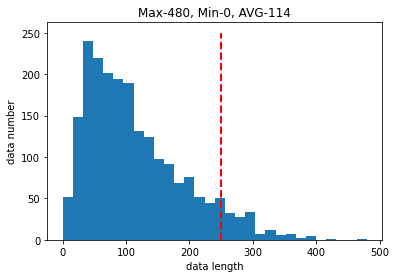

In [61]:
# 전체 데이터의 길이 시각화
length=[len(data) for data in seq_train]

import matplotlib.pyplot as plt
import numpy as np
plt.hist(length, bins=30)
plt.plot([250, 250], [0, 250], c='red', linestyle='--', linewidth=2)
plt.title(f'Max-{max(length)}, Min-{min(length)}, AVG-{round(np.mean(length))}')
plt.xlabel('data length')
plt.ylabel('data number')
plt.show()

In [40]:
# 데이터 길이 변경
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_length=250   # 한 데이터의 토큰(단어) 수

x_train = pad_sequences(seq_train, maxlen=pad_length)
x_test = pad_sequences(seq_test, maxlen=pad_length)
x_val = pad_sequences(seq_val, maxlen=pad_length)

In [41]:
print(f'x_train : {x_train.shape}, x_test : {x_test.shape}, x_val : {x_val.shape}')
print(f'y_train : {y_train.shape}, y_test : {y_test.shape}, y_val : {y_val.shape}')

x_train : (2114, 250), x_test : (661, 250), x_val : (529, 250)
y_train : (2114, 6), y_test : (661, 6), y_val : (529, 6)


## [3] Model 구성 및 구현
---
- 목표 : 노래 가사 분석 후 장르 분류
- 데이터 : 수치화된 벡터 데이터

#### Embedding RNN Model
---
- One-Hot-Encoding 입력 데이터의 많은 메모리 소모에 대한 문제 해결
- 토큰을 밀집형태의 벡터로 변경 => Word Embedding
- Embedding Layer 적용
    - 입력 차원 - 토큰의 크기 즉 단어사전의 크기
    - 출력 차원 - 줄여서 생성하는 벡터 크기
    - 입력 층일 경우 -> input_dim = 타임스템프 즉 하나의 문장을 구성하는 토큰 수

In [42]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

### [3-1] 모델 구성
---

In [43]:
EMB_DIM = 96                # 임베딩 벡터 크기
WORD_NUM = voca_num         # 단어 사전 단어 수
HIDDEN_NODE = 32            # 은닉층 뉴런 수
INPUT_LENGTH = pad_length   # 한 문장의 토큰 수

In [44]:
model = Sequential()
# One-Hot-Encoding WORD_NUM의 거대한 데이터 => 밀집형태 EMB_DIM 크기 벡터로 변환
model.add(Embedding(WORD_NUM, EMB_DIM, input_length=INPUT_LENGTH))
model.add(SimpleRNN(HIDDEN_NODE))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 96)           457056    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4128      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 465,574
Trainable params: 465,574
Non-trainable params: 0
_________________________________________________________________


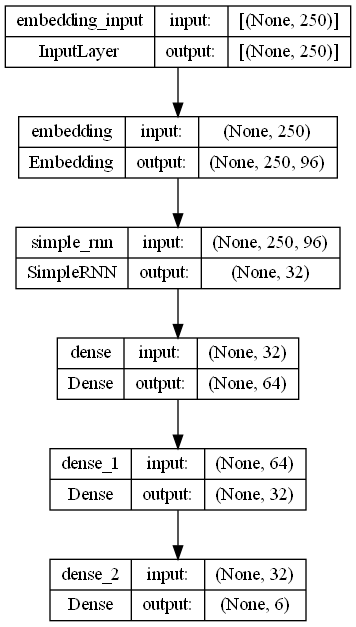

In [45]:
plot_model(model, show_shapes=True)

### [3-2] 모델 생성
---
- 손실함수, 최적화방법, 평가항목 => compile()

In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### [3-3] 학습
---
- train 데이터와 타겟으로 학습 진행
- epoch마다 검증 진행 => validation_data, validation_split
- 학습 중 이벤트 처리 => callbacks=[]
- 학습 진행 내용 출력 설정 => verbose
- 학습 횟수 설정 => epochs
- 학습 분량 설정 => batch_size (기본:32)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
# 검증 데이터에 대한 loss값 5번 연속 개선되지 않으면 학습 중지
stopCB = EarlyStopping(monitor='val_loss', patience=5)

In [49]:
his = model.fit(x_train,
                y_train,
                epochs=20,
                batch_size=64,
                validation_data=(x_val, y_val),
                callbacks=[stopCB])

Epoch 1/20
34/34 [==============================] - 4s 81ms/step - loss: 1.6521 - accuracy: 0.3292 - val_loss: 1.5669 - val_accuracy: 0.3270
Epoch 2/20
34/34 [==============================] - 2s 68ms/step - loss: 1.3786 - accuracy: 0.4929 - val_loss: 1.5098 - val_accuracy: 0.3932
Epoch 3/20
34/34 [==============================] - 2s 68ms/step - loss: 1.1369 - accuracy: 0.6060 - val_loss: 1.4150 - val_accuracy: 0.5009
Epoch 4/20
34/34 [==============================] - 2s 67ms/step - loss: 0.8659 - accuracy: 0.6982 - val_loss: 1.6504 - val_accuracy: 0.4348
Epoch 5/20
34/34 [==============================] - 2s 66ms/step - loss: 0.5877 - accuracy: 0.7947 - val_loss: 1.5422 - val_accuracy: 0.5161
Epoch 6/20
34/34 [==============================] - 2s 64ms/step - loss: 0.3543 - accuracy: 0.8827 - val_loss: 1.7147 - val_accuracy: 0.5028
Epoch 7/20
34/34 [==============================] - 2s 64ms/step - loss: 0.1853 - accuracy: 0.9565 - val_loss: 1.8312 - val_accuracy: 0.4934
Epoch 8/20
34

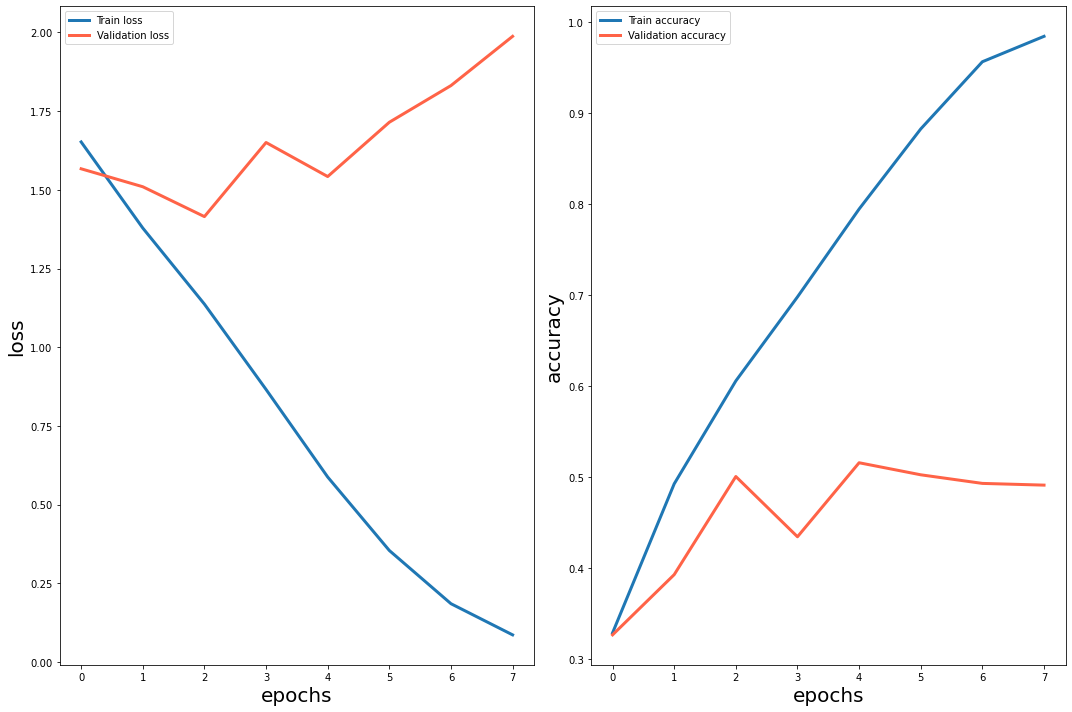

In [50]:
# loss, accuracy 시각화
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(his.epoch, his.history['loss'], label='Train loss', linewidth=3)
plt.plot(his.epoch, his.history['val_loss'], label='Validation loss', color='tomato', linewidth=3)
plt.xlabel('epochs', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.legend()

plt.subplot(122)
plt.plot(his.epoch, his.history['accuracy'], label='Train accuracy', linewidth=3)
plt.plot(his.epoch, his.history['val_accuracy'], label='Validation accuracy', color='tomato', linewidth=3)
plt.xlabel('epochs', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.legend()

plt.tight_layout()
plt.show()

### [3-4] 모델 평가
---
- evaluate() 메서드
- 반환값 : loss, compile()의 metrics에서 설정된 항목값

In [51]:
model.evaluate(x_test, y_test)

21/21 [==============================] - 0s 11ms/step - loss: 2.0208 - accuracy: 0.5008


[2.020841598510742, 0.5007564425468445]

### [3-5] 예측
---
- 새로운 데이터

In [70]:
txt='''뭐하고 있었니 늦었지만
잠시 나올래
너의 집 골목에 있는
놀이터에 앉아 있어 
친구들 만나서 오랜만에 
술을 좀 했는데 
자꾸만 니 얼굴 떠올라 
무작정 달려왔어 
이 맘 모르겠니 
요즘 난 미친 사람처럼 
너만 생각해 
대책없이 네가 점점 좋아져 
아냐 안 취했어 진짜야 
널 정말 사랑해 
눈물이 날만큼 원하고 있어
정말로 몰랐니
가끔 전화해 장난치듯 
주말엔 뭐할거냐며
너의 관심 끌던 나를 
그리고 한번씩 누나 주려 샀는데
너 그냥 준다고
생색 낸 선물도 너 때문에 산거야
이 맘 모르겠니
요즘 난 미친 사람처럼 
너만 생각해 
대책없이 네가 점점 좋아져 
아냐 안 취했어 진짜야 
널 정말 사랑해 
진심이야 믿어줘 
갑자기 이런 말 놀랐다면 미안해 
부담이 되는게 당연해 
이해해 널 
하지만 내 고백도 이해해 주겠니 oh
지금 당장 대답하진마
나와 일주일만 사귀어줄래 
후회없이 잘 해주고 싶은데 
그 후에도 니가 싫다면 
나 그때 포기할게
귀찮게 안할게 혼자 아플게 
진심이야 너를 사랑하고 있어'''

In [71]:
txt1='''You and me
내 맘이 보이지 
한참을 쳐다봐
가까이 다가가
You see
You see, ey ey ey ey

One, two, three
용기가 생겼지
이미 아는 네 눈치
고개를 돌려 천천히
여기
You see
여기 보이니

Looking for attention 너야겠어
확실하게 나로 만들겠어
Stop, eyyy
Drop the question
Drop the, drop the question
Want attention
Wanna want attention

You give me butterflies you know
내 맘은 온통 paradise
꿈에서 깨워주지 마

You got me looking for attention
You got me looking for attention
가끔은 정말
헷갈리지만
분명한 건
Got me looking for attention

널 우연히 마주친 척할래
못 본 척 지나갈래
You’re so fine
Gotta gotta get to know ya
나와 나와 걸어가 줘

지금 돌아서면
I need ya, need ya, need ya
To look at me back
Hey 다 들켰었나
널 보면 하트가 튀어나와

난 사탕을 찾는 baby (baby)
내 맘은 설레이지
Eyyy, drop the question
Drop the, drop the question
Want attention
Wanna want attention

You give me butterflies you know
내 맘은 온통 paradise
꿈에서 깨워주지 마

You got me looking for attention
You got me looking for attention
가끔은 정말
헷갈리지만
분명한 건
Got me looking for attention

You got me looking for attention
You got me looking for attention
가끔은 정말
헷갈리지만
분명한 건
Got me looking for attention

A T T E N T I on
Attention is what I want
A T T E N T I on
Attention is what I want
A T T E N T I on
Attention is what I want
A T T E N T I on
You got me looking for attention'''

In [72]:
txt2='''아 당신은 못 믿을 사람 
아 당신은 철없는 사람 
아무리 달래봐도 어쩔 순 없지만
마음 하나는 괜찮은 사람
오늘은 들국화
또 내일은 장미꽃
치근 치근 치근대다가 잠이 들겠지
난 이제 지쳤어요 땡벌
기다리다 지쳤어요 땡벌
혼자서는 이 밤이 너무너무 추워요

당신은 못 말리는 땡벌
당신은 날 울리는 땡벌
혼자서는 이 밤이 너무너무 길어요
아 당신은 야속한 사람
아 당신은 모를 사람
밉다가도 돌아서면 마음에 걸리는
마음 하나는 따뜻한 사람
바람에 맴돌다
또 맴돌다 어딘가
기웃기웃 기웃대다가 잠이 들겠지
난 이제 지쳤어요 땡벌
기다리다 지쳤어요 땡벌
혼자서는 이 밤이 너무너무 추워요

당신은 못 말리는 땡벌
당신은 날 울리는 땡벌
혼자서는 이 밤이 너무너무 길어요
당신을 사랑해요 땡벌
당신을 좋아해요 땡벌
밉지만 당신을 너무너무 사랑해'''

In [73]:
txt3='''어쩜 이렇게 하늘은 더 파란 건지
오늘따라 왜 바람은 또 완벽한지
그냥 모르는 척 하나 못들은 척
지워버린 척 딴 얘길 시작할까
아무 말 못하게 입맞출까

눈물이 차올라서 고갤 들어
흐르지 못하게 또 살짝 웃어
내게 왜 이러는지 무슨 말을 하는지
오늘 했던 모든 말 저 하늘 위로
한번도 못했던 말
울면서 할 줄은 나 몰랐던 말
나는요 오빠가 좋은걸 어떡해

새로 바뀐 내 머리가 별로였는지
입고 나왔던 옷이 실수였던 건지
아직 모르는 척 기억 안 나는 척
아무 일없던 것처럼 굴어볼까
그냥 나가자고 얘기할까

눈물이 차올라서 고갤 들어
흐르지 못하게 또 살짝 웃어
내게 왜 이러는지 무슨 말을 하는지
오늘 했던 모든 말 저 하늘 위로
한번도 못했던 말
울면서 할 줄은 나 몰랐던 말
나는요 오빠가 좋은걸 (휴~) 어떡해

이런 나를 보고 그런 슬픈 말은 하지 말아요
철없는 건지 조금 둔한 건지
믿을 수가 없는걸요

눈물은 나오는데 활짝 웃어
네 앞을 막고서 막 크게 웃어
내가 왜 이러는지 부끄럼도 없는지
자존심은 곱게 접어 하늘위로
한 번도 못했던 말
어쩌면 다신 못할 바로 그 말
나는요 오빠가 좋은걸 (아이쿠, 하나 둘) 
I'm in my dream

It's too beautiful, beautiful day
Make it a good day
Just don't make me cry

이렇게 좋은 날'''

In [74]:
txt4='''너 아까 나한테 왜 그랬어
너 또 왜 그러는데
내가 도대체 어디까지 맞춰야 돼
넌 맨날 그런 식이야
됐어 나 갈게

너는 뛰쳐나가 차 문을 부술듯이 닫으면서
난 머리를 쳐박고 한숨 쉬어 핸들을 안으면서
이런 광경이 너무 익숙해 이젠
웬만한 싸움에는 상처도 잘 안나 이젠
명품 쇼핑할 때처럼 너무 깐깐해 니 기준은
한번 화나면 뒤끝 장난 아냐
적어도 2주는 가니까
난 성격이 너무 물러서
넌 항상 말해 남자니까 뒤로 좀 물러서
부담돼 니가 내게 결혼을 보채는 것도
난 달인처럼 대화 화제를 돌리는 법도
많이 늘었어
넌 항상 추격하고 나는 도망쳐
솔직히 말할게 난 아직 준비 안 됐어
지쳤어 조금 널 향한 사랑은 도금이
벗겨진 반지처럼 빛이 바랬어
오늘은 이별을 말해야 될 것 같아
지겹거든 너랑 다툴 때마다 항상 하는 말

내가 죽일 놈이지 뭐
우리가 어긋날 때면
전부 내 탓이지 뭐
마치 죄인인 것처럼
난 한걸음 물러섰어
아무 말도 안해
완벽한 너한테 난
항상 부족한 사람인 걸

처음엔 쉬웠어 너와 함께라는 게
난 너를 피해 내 자신을 숨기고 또 지웠어
사랑에 취해 내게 기대고
너란 퍼즐에 날 억지로 맞춰 끼웠어
하지만 이제 난 지쳤어
니가 만든 내게 난 숨이 막혀 오는데
넌 점점 더 내게 바라는게 많아졌어
마찰이 잦아졌어
니가 사준 구두굽처럼 사랑이 닳아졌어
니 잔소리는 넥타이처럼 내 목을 조여서
날 얌전하게 만들었지
그래서 그게 좋아 보였어
그때는 속은 한참 뒤틀리고 꼬였어
지금 난 널 만나기 전에 내가 너무 고파
이미 우리 사이 권태라는 벽은 너무 높아
내가 더 잘할게 잘할게하며 발악했던 나지만
오늘은 말할래 이것이 너와 나의 마지막

내가 죽일 놈이지 뭐
우리가 어긋날 때면
전부 내 탓이지 뭐
마치 죄인인 것처럼
난 한걸음 물러섰어
아무 말도 안해
완벽한 너한테 난
항상 부족한 사람인 걸

내가 잘할게
내가 잘할게란 말 이젠 두 번 다신 안할게
이 말 안할래
너를 사랑해란 말 이젠 두 번 다신 안할게
내가 잘할게
내게 잘해달란 말 이젠 두 번 다신 안할게
이 말 안할래
그동안 참아왔던 이별을 오늘은 네게 말할래

I Don't want say no more
내가 죽일 놈이지 뭐
우리가 어긋날 때면
전부 내 탓이지 뭐
마치 죄인인 것처럼
난 한걸음 물러섰어
아무 말도 안해
완벽한 너한텐 난
항상 부족한 사람인 걸

I Don't want say no more
I Don't want say no more'''

In [75]:
txt5='''아무때고 니게 전활해
나야 하며 말을 꺼내도
누군지 한번에 알아낼
너의 단 한 사람
쇼윈도에 걸린 셔츠를 보면
제일 먼저 니가 떠올릴 사람
너의 지갑 속에
항상 간직될 사람
니게 그런 사람이
나 일순 없는지
니곁에 있는
내 친구가 아니라
언젠가 그가 너를
맘 아프게 해
너 혼자 울고 있는걸 봤어
달려가 그에게
나 이말 해줬으면
그대가 울리는
그 한 여자가
내겐 삶의 전부라고
혼자서는 힘든 슬픔이 오면
제일 먼저 니가 찾아 줄 사람
너의 생일마다
꽃을 안겨 줄 사람
니게 그런 사람이
나 일순 없는지
니곁에 있는
내 친구가 아니라
언젠가 그가 너를
맘 아프게 해
너 혼자 울고 있는걸 봤어
달려가 그에게
나 이말 해줬으면
나의 일생을 모두 주어도
난 얻지 못하는
그녈 가진 그대라고 우
그녈 곁에 둔 이유만으로
다른 이 세상 누구보다
그댄 행복한 거라고
언젠가 그가 너를
맘 아프게 해
너 혼자 울고 있는걸 봤어
달려가 그에게
나 이말 해줬으면'''

In [77]:
import re

label=['발라드','댄스','트로트','가요','랩/힙합','락']
print(label)

def pred(txt):
    txt = re.sub('\n|\r', ' ', txt)
    
    # 불용어 제거
    wT=[]
    word=word_tokenize(txt)
    if word not in fireList:
        wT.extend(word)
    
    # 한 문장으로 이어주기
    txt=' '.join(wT)

    # 문장을 생성된 사전(vaca)를 기반으로 수치화
    seq_txt=tokenizer.texts_to_sequences([txt])


    # 한 문장의 토큰 수
    pre = pad_sequences(seq_txt, maxlen=pad_length)

    print(f'예측값 =>  {label[np.round(model.predict(pre, verbose=0), 2).argmax()]} : {np.round(model.predict(pre, verbose=0), 2)}')
    
pred(txt), pred(txt1), pred(txt2), pred(txt3), pred(txt4), pred(txt5)

['발라드', '댄스', '트로트', '가요', '랩/힙합', '락']
예측값 =>  발라드 : [[0.43 0.04 0.   0.35 0.01 0.17]]
예측값 =>  댄스 : [[0.   0.96 0.   0.01 0.03 0.  ]]
예측값 =>  트로트 : [[0.01 0.   0.9  0.03 0.   0.06]]
예측값 =>  발라드 : [[0.88 0.04 0.   0.03 0.   0.05]]
예측값 =>  댄스 : [[0.2  0.69 0.   0.09 0.01 0.01]]
예측값 =>  락 : [[0.01 0.   0.04 0.02 0.   0.92]]


(None, None, None, None, None, None)

### [4-1] 모델 구성

In [56]:
model1 = Sequential()
model1.add(Embedding(WORD_NUM, EMB_DIM, input_length=INPUT_LENGTH))
model1.add(SimpleRNN(35, return_sequences=True))
model1.add(GRU(25, return_sequences=True))
model1.add(SimpleRNN(15))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(6, activation='softmax'))

### [4-2] 모델 생성

In [57]:
model1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics='accuracy')

### [4-3] 모델 학습

In [58]:
his1 = model1.fit(x_train,
                  y_train,
                  epochs=20,
                  batch_size=64,
                  validation_data=(x_val, y_val),
                  callbacks=[stopCB])

Epoch 1/20
34/34 [==============================] - 12s 245ms/step - loss: 1.6385 - accuracy: 0.3401 - val_loss: 1.5634 - val_accuracy: 0.3932
Epoch 2/20
34/34 [==============================] - 7s 221ms/step - loss: 1.4589 - accuracy: 0.4385 - val_loss: 1.5100 - val_accuracy: 0.4121
Epoch 3/20
34/34 [==============================] - 8s 245ms/step - loss: 1.2537 - accuracy: 0.5345 - val_loss: 1.4691 - val_accuracy: 0.4594
Epoch 4/20
34/34 [==============================] - 9s 266ms/step - loss: 0.9581 - accuracy: 0.7138 - val_loss: 1.4529 - val_accuracy: 0.4896
Epoch 5/20
34/34 [==============================] - 9s 251ms/step - loss: 0.6635 - accuracy: 0.8302 - val_loss: 1.4879 - val_accuracy: 0.5161
Epoch 6/20
34/34 [==============================] - 8s 226ms/step - loss: 0.4374 - accuracy: 0.8865 - val_loss: 1.4911 - val_accuracy: 0.5142
Epoch 7/20
34/34 [==============================] - 7s 218ms/step - loss: 0.2828 - accuracy: 0.9465 - val_loss: 1.5953 - val_accuracy: 0.4877
Epoch

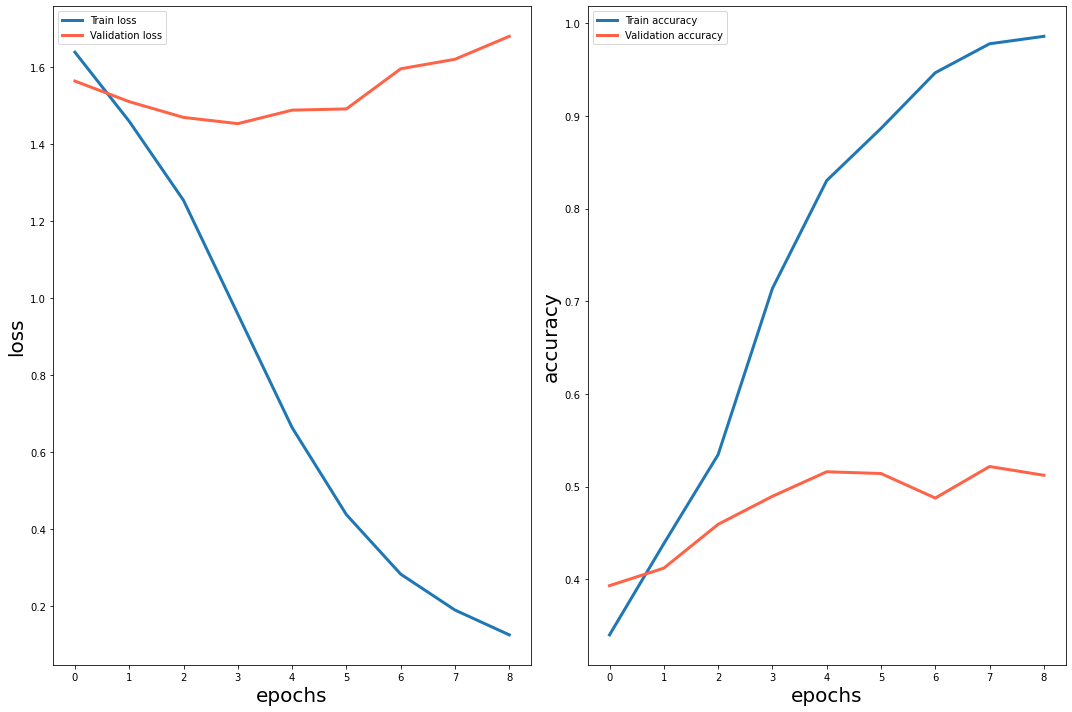

In [59]:
# loss, accuracy 시각화
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(his1.epoch, his1.history['loss'], label='Train loss', linewidth=3)
plt.plot(his1.epoch, his1.history['val_loss'], label='Validation loss', color='tomato', linewidth=3)
plt.xlabel('epochs', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.legend()

plt.subplot(122)
plt.plot(his1.epoch, his1.history['accuracy'], label='Train accuracy', linewidth=3)
plt.plot(his1.epoch, his1.history['val_accuracy'], label='Validation accuracy', color='tomato', linewidth=3)
plt.xlabel('epochs', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.legend()

plt.tight_layout()
plt.show()

### [4-4] 모델 평가

In [60]:
model1.evaluate(x_test, y_test)

21/21 [==============================] - 1s 40ms/step - loss: 1.6431 - accuracy: 0.5189


[1.6431421041488647, 0.5189107656478882]

### [4-5] 예측

In [78]:
import re

label=['발라드','댄스','트로트','가요','랩/힙합','락']

print(label)

def pred1(txt):
    txt = re.sub('\n|\r', ' ', txt)
    
    # 불용어 제거
    wT=[]
    word=word_tokenize(txt)
    if word not in fireList:
        wT.extend(word)
    
    # 한 문장으로 이어주기
    txt=' '.join(wT)

    # 문장을 생성된 사전(vaca)를 기반으로 수치화
    seq_txt=tokenizer.texts_to_sequences([txt])


    # 한 문장의 토큰 수
    pre = pad_sequences(seq_txt, maxlen=pad_length)

    print(f'예측값 =>  {label[np.round(model1.predict(pre, verbose=0), 2).argmax()]} : {np.round(model1.predict(pre, verbose=0), 2)}')
    
pred1(txt), pred1(txt1), pred1(txt2), pred1(txt3), pred1(txt4), pred1(txt5)

['발라드', '댄스', '트로트', '가요', '랩/힙합', '락']
예측값 =>  발라드 : [[0.88 0.03 0.01 0.05 0.03 0.  ]]
예측값 =>  댄스 : [[0.   0.95 0.   0.   0.04 0.  ]]
예측값 =>  트로트 : [[0.08 0.   0.83 0.08 0.   0.01]]
예측값 =>  댄스 : [[0.01 0.56 0.01 0.02 0.39 0.02]]
예측값 =>  랩/힙합 : [[0.01 0.03 0.   0.07 0.53 0.35]]
예측값 =>  락 : [[0.   0.   0.   0.03 0.05 0.92]]


(None, None, None, None, None, None)